<a href="https://colab.research.google.com/github/Lornzo1/Al_CWM/blob/main/ex1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**You should fully understand the code and add code to appropriate places. You are suggested to read through all comments/annotations as they may help you understand code or indicate where you need to add code.**


**Question 1.** Below we generated a dataset. Please:
1. visualize the true function $y=\sin(\pi x)$
2. on the generated training data, do linear regression to fit the data by the np.linalg.solve function (https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). You might encounter error, and please think about why and how to fix it.
3. visualize the fitted function.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi

# generate 20 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,20)

# generate training target (noise contaminated!)
y=np.sin(pi*x)+0.3*np.random.randn(x.size)

# plot the training data points
plt.plot(x, y, 'ro')

# TODO: plot the true function here


In [ ]:
X = [x]
X.append(np.ones(x.shape))
X = np.array(X).T
print(X.shape)

# TODO: solve the linear system by np.linalg.solve
theta =

# TODO: get the prediction
yhat =

plt.plot(x,y,'o', x, yhat)

# plot the true function
plt.plot(np.linspace(-1,1,50), np.sin(2*pi*.5*np.linspace(-1,1,50)), 'black')

**Question 2**. Use the training set provided below along with the validation set to answer the following questions.

1. Gradually add features of higher degrees and solve the linear regression. How do the validation and testing errors change as you increase the number of features?

To clarify, originally, we have 20 data points with only one scalar feature. Now, add polynomial features so you have $1, x, x^2, x^3, \ldots, x^M$, resulting in $M+1$ features (the additional one is a constant unit, representing the intercept of the line). This expansion will produce a 20-by-$(M+1)$ data matrix.

2. Using a fixed number of basis functions, say $M=10$, test with different regularization weights: $0, 0.0001, 0.001, 0.01, 0.1$. Repeat the procedure described in above question and observe the changes in validation error. Additionally, print out the norm of the solution for each regularization weight.

Questions to answer:
- How does the validation error change with different regularization weights?
- What do you observe about the norms of the solutions?
- Why do you think the norm changes in the way it does as the regularization weight increases?

3. Increase the number of basis: ($1, 5, 10, 15, 20$), check the norm of weight again. What do you find and why? Note: you should divide the $l2$ norm by the square root of number of columns to get a fair comparison.

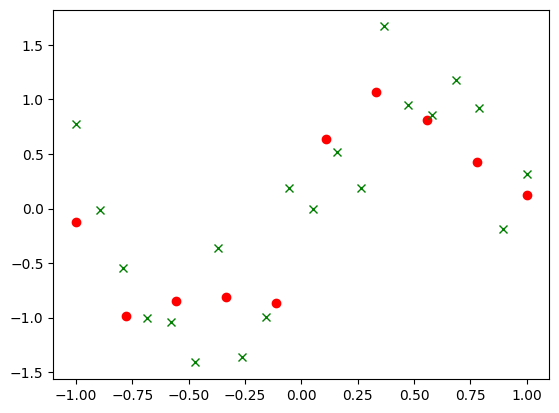

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi=math.pi
# generate 10 numbers from -1 to 1 with equal stepsize
x=np.linspace(-1,1,10)

# generate training target (noise contaminated!)
y=np.sin(2*pi*.5*x)+0.4*np.random.randn(x.size)

# define a validation set
xv=np.linspace(-1,1,20)
yv=np.sin(2*pi*.5*xv)+0.4*np.random.randn(xv.size)

plt.plot(x,y,'ro', xv, yv,'gx')

In [ ]:
error_val= []
error_train = []
# try increasing number of basis
for M in [1, 2, 4, 8, 16, 20]:
  plt.figure()

  basis = np.arange(M+1)
  # TODO: create feature with polynomial basis: so the 1st column is 1, 2nd is x, 3rd is x^2, x^3, ...
  # You are suggested to USE broadcasting,instead of for loop to generate X
  X =
  print(X.shape)

  # TODO: get the solution with regularization term (you can simply set reg=0 to remove the regularization effect)
  reg = 0.000001
  theta =
  yhat =
  # plot the fitted function
  plt.plot(x,yhat, label='fitted')

  # plot the train and validation data
  plt.plot(x,y,'ro', label='train')

  # show labels
  plt.legend()

  # compute val error and train error
  # TODO: use the same polynomial feature for validation dataset to get Xv
  Xv =
  # TODO: get predictions on the validation data
  yhat_val =
  error = np.sum((yv - yhat_val)**2)
  error_t = np.sum((y - yhat)**2)

  error_val.append(error)
  error_train.append(error_t)

# visualize how validation error changes as we increase basis
plt.figure()
plt.plot(error_val, label='val-err')
plt.plot(error_train, label='train-err')
plt.legend()

**Question 3.** Assume you have previously trained a linear regression model on a dataset $(X, y)$ using a regularization weight. However, the feature matrix $X$, an $n$-by-$d$ matrix, is accidentally contaminated with zero-mean Gaussian noise. This noise is independent of the data and has a reasonably small constant variance. Consequently, your feature matrix becomes $X + \epsilon$, where $\epsilon$ is an $n$-by-$d$ matrix with entries independently sampled from the same Gaussian distribution. You may wonder if you should be concerned about significant changes in your solution. Please provide mathematical reasoning to support your answer. Additionally, you may consider conducting empirical tests to further investigate your opinion or conjecture.

Hint: To simplify your analysis, considering the effect of adding such noise to a single training example may be sufficient.

In [ ]:
# DO NOT change the code in this cell
import pandas as pd
import numpy as np
np.random.seed(0)
fileloc = 'https://raw.githubusercontent.com/yannickycpan/oxford-engs-AIML-cwm/main/realestate.txt'
dataset = pd.read_csv(fileloc)
dataset = dataset.values
np.random.shuffle(dataset)
print(dataset.shape)
tn = 300
X, y = dataset[:tn,:-1], dataset[:tn,-1]
Xval, yval = dataset[tn:,:-1], dataset[tn:,-1]
print(X.shape, y.shape)

In [ ]:
np.random.seed(0)

reg=0.1
sig = 0.01

# TODO: compute the solution on the original dataset with regularization weight reg=0.1
theta =

# add noise to the dataset
NX = X + np.random.normal(0., sig, X.shape)
# TODO: compute the solution using the perturbed dataset
# you might test the solution with and without regularization
ntheta =

## print out the validation error on both original and perturbed data
print(np.sum((Xval@theta-yval)**2), np.sum((Xval@ntheta-yval)**2))